In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

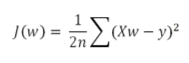

In [2]:
# Fórmula Geral
from IPython.display import Image
Image('imagens/formula-gradient-descent1.png')

In [3]:
# Carregando o Dataset
from sklearn.datasets import load_boston
boston = load_boston() 

In [4]:
# Convertendo o dataset em um dataframe
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [5]:
# Definindo x e y
observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1)) 
X = np.column_stack((X,np.ones(observations))) 
y = dataset['target'].values 

In [6]:
import random

# Valores randômicos para os coeficientes iniciais
def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

In [7]:
# Cálculo da hipótese (valor aproximado de y)
def hypothesis(X,w):
    return np.dot(X,w)

In [8]:
# Cálculo da função de perda (loss)
def loss(X,w,y):
    return hypothesis(X,w) - y

In [9]:
# Cálculo do erro
def squared_loss(X,w,y):
    return loss(X,w,y)**2

In [10]:
# Cálculo do gradiente
def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

In [11]:
# Atualização do valor dos coeficientes
def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

In [12]:
# Otimização do modelo
def optimize(X,y, alpha = 0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha = alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k >= 5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path

In [13]:
# Definindo o valor de alfa (taxa de aprendizagem)
alpha = 0.048

# Otimizando a Cost Function
w, path = optimize(X, y, alpha, eta = 10**-12, iterations = 25000)

In [14]:
# Imprimindo o resultado
print ("Valor Final dos Coeficientes: %s" % w)

Valor Final dos Coeficientes: [9.10210331730668, -34.67058474787003]


In [15]:
# Imprimindo o resultado
print ("Percorrendo o Caminho do Gradiente em que o erro ao quadrado era:\n\n %s" % path)

Percorrendo o Caminho do Gradiente em que o erro ao quadrado era:

 [90394.45465413798, 23811.93834828854, 22475.171364516686, 22159.48184934467, 22084.92893832922, 22067.322599588922, 22063.164704751336, 22062.182780585532, 22061.95089038507, 22061.896127433974, 22061.883194671806, 22061.880140483998, 22061.879419210152, 22061.87924887486, 22061.87920864865, 22061.879199148872, 22061.879196905415, 22061.879196375605, 22061.879196250484, 22061.879196220936, 22061.879196219896]
